In [ ]:
import requests
import numpy as np

#Get info from weatherapi.com
url = "https://weatherapi-com.p.rapidapi.com/current.json"

headers = {
	"X-RapidAPI-Key": 'a10ea63875msh4e771d6a7e937a0p10d0f0jsne1315d7697c9',
	"X-RapidAPI-Host": "weatherapi-com.p.rapidapi.com"
}

# Define the regions (approximate corners of continents)
#Asia was cut into Western Asia and Normal Asia due to -180 being the same as 180
regions = {
    "South America": [(12, -81), (-55, -35)],
    "North America": [(83, -172), (7, -20)],
    "Europe": [(82, -25), (35, 60)],
    "Africa": [(37, -17), (-35, 51)],
    "Asia": [(77, 26), (1, 180)],
    "Asia W": [(77, -180), (1, -170)],
    "Australia": [(-10, 113), (-44, 154)]
}

# Initialize the API call counter for calculation of API calls used
api_calls = 0

results = []

#The 10 and -10 values allow us to segment the continents into 10 Longitude by 10 Latitude
for region, (top_left, bottom_right) in regions.items():
    latitudes = np.arange(top_left[0], bottom_right[0], -10)
    longitudes = np.arange(top_left[1], bottom_right[1], 10)
    
    for lat in latitudes:
        for lon in longitudes:
            # We were given 1000 free API calls per hour, and we wanted to stop the programme in case it exhausted too many
            if api_calls >= 500:  
                print("Reached the API call limit.")
                break

            querystring = {"q": f"{lat},{lon}"}
            response = requests.get(url, headers=headers, params=querystring)
            data = response.json()

            # Check if the 'location' key exists in the response and if the location name contains digits, as non existant locations and Areas like kilometer 52 are useless
            if 'location' in data and not any(char.isdigit() for char in data['location']['name']):
                # Extract location, temperature, and precipitation values
                location = data['location']['name']
                temperature = data['current']['temp_c']
                precipitation = data['current']['precip_mm']

                # Prints the results in an easy to use format
                results.append((region, (lat, lon), location, temperature, precipitation))
            api_calls =+ 1
# Prints the results
for result in results:
     print(result)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.cm as cm

# Create a figure and an axis
fig, ax = plt.subplots()


# Define the coordinates for Australia
llcrnrlat = -44  # lower left corner latitude
urcrnrlat = -10  # upper right corner latitude
llcrnrlon = 113  # lower left corner longitude
urcrnrlon = 154  # upper right corner longitude

# Create a Basemap instance for Australia
m = Basemap(projection='cyl', resolution="i", llcrnrlat=llcrnrlat, urcrnrlat=urcrnrlat, llcrnrlon=llcrnrlon, urcrnrlon=urcrnrlon, ax=ax)

# Draw coastlines and countries
m.drawcoastlines()
m.drawcountries()

# Get the temperature values
temperatures = [result[3] for result in results]

# Create a colormap
cmap = plt.get_cmap('seismic')
normalize = plt.Normalize(vmin=min(temperatures), vmax=max(temperatures))

# Loop over the results and plot each point on the map
for result in results:
    region, (lat, lon), location, temperature, precipitation = result
    x, y = m(lon, lat)
    color = cmap(normalize(temperature))
    m.plot(x, y, 'o', markersize=5, color=color)

# Show the plot
plt.show()

In [ ]:
from bs4 import BeautifulSoup
from requests_html import HTMLSession

def get_weather(city):
    # Create a session
    session = HTMLSession()
    # Make a request to the website
    r = session.get(f"https://www.google.com/search?q=weather+{city}")
    # Render the HTML, including executing JavaScript
    r.html.render()
    # Create an instance of BeautifulSoup
    s = BeautifulSoup(r.html.html, "html.parser")
    # Find the div with id "wob_loc"
    location = s.find("div", attrs={"id": "wob_loc"})
    print(location)  # Add this line to debug
    if location:
        location = location.text
    # ... repeat for other attributes ...

# Test the function
print(get_weather("Singapore"))

In [ ]:
import requests

def get_weather(city):
    url = "http://api.weatherapi.com/v1/current.json"
    params = {
        "key": 'f3e32f54ccmshc2c78e352c1a07ap1722e2jsn08874217f056',  # your API key
        "q": city,  # the city you want the weather for
    }
    response = requests.get(url, params=params)
    return response.json()

# usage
weather_data = get_weather("London")
print(weather_data)


In [ ]:
import requests

url = "https://weatherapi-com.p.rapidapi.com/current.json"

querystring = {"q":"53.1,-0.13"}

headers = {
	"X-RapidAPI-Key": "f3e32f54ccmshc2c78e352c1a07ap1722e2jsn08874217f056",
	"X-RapidAPI-Host": "weatherapi-com.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)
data = response.json()

# Extract temperature and precipitation values
temperature = data['current']['temp_c']
precipitation = data['current']['precip_mm']

print(f"Temperature: {temperature}°C")
print(f"Precipitation: {precipitation}mm")



In [ ]:
import requests

url = "https://weatherapi-com.p.rapidapi.com/current.json"

headers = {
	"X-RapidAPI-Key": "f3e32f54ccmshc2c78e352c1a07ap1722e2jsn08874217f056",
	"X-RapidAPI-Host": "weatherapi-com.p.rapidapi.com"
}

# List of South East Asian countries
countries = ["Brunei", "Cambodia", "Indonesia", "Laos", "Malaysia", "Myanmar", "Philippines", "Singapore", "Thailand", "Vietnam", "East Timor"]

for country in countries:
    querystring = {"q": country}
    response = requests.get(url, headers=headers, params=querystring)
    data = response.json()

    # Extract country name, temperature, and precipitation values
    country_name = data['location']['name']
    temperature = data['current']['temp_c']
    precipitation = data['current']['precip_mm']

    print(f"Country: {country_name}")
    print(f"Temperature: {temperature}°C")
    print(f"Precipitation: {precipitation}mm")
    print("------------------------")


In [ ]:
headers = {
	"X-RapidAPI-Key": "f3e32f54ccmshc2c78e352c1a07ap1722e2jsn08874217f056",
	"X-RapidAPI-Host": "weatherapi-com.p.rapidapi.com"
}

# List of South East Asian states
states = ["Johor, Malaysia", "Sarawak, Malaysia", "Jakarta, Indonesia", "Bali, Indonesia", "Manila, Philippines", "Cebu, Philippines", "Bangkok, Thailand", "Chiang Mai, Thailand", "Hanoi, Vietnam", "Ho Chi Minh City, Vietnam"]

for state in states:
    querystring = {"q": state}
    response = requests.get(url, headers=headers, params=querystring)
    data = response.json()

    # Extract state name, temperature, and precipitation values
    state_name = data['location']['name']
    temperature = data['current']['temp_c']
    precipitation = data['current']['precip_mm']

    print(f"State: {state_name}")
    print(f"Temperature: {temperature}°C")
    print(f"Precipitation: {precipitation}mm")
    print("------------------------")

In [ ]:
import requests

url = "https://weatherapi-com.p.rapidapi.com/current.json"

headers = {
	"X-RapidAPI-Key": "f3e32f54ccmshc2c78e352c1a07ap1722e2jsn08874217f056",
	"X-RapidAPI-Host": "weatherapi-com.p.rapidapi.com"
}

# Divide the world into 5 degree longitude by 5 degree latitude chunks
for lat in range(-90, 90, 5):
    for lon in range(-180, 180, 5):
        querystring = {"q": f"{lat},{lon}"}
        response = requests.get(url, headers=headers, params=querystring)
        data = response.json()

        # Extract location, temperature, and precipitation values
        location = data['location']['name']
        temperature = data['current']['temp_c']
        precipitation = data['current']['precip_mm']

        print(f"Location: {location}")
        print(f"Temperature: {temperature}°C")
        print(f"Precipitation: {precipitation}mm")
        print("------------------------")

In [ ]:
import requests
import numpy as np

url = "https://weatherapi-com.p.rapidapi.com/current.json"

headers = {
	"X-RapidAPI-Key": "f3e32f54ccmshc2c78e352c1a07ap1722e2jsn08874217f056",
	"X-RapidAPI-Host": "weatherapi-com.p.rapidapi.com"
}

# Define the regions (approximate corners of continents)
regions = {
    "South America": [(12, -81), (-55, -35)],
    "North America": [(83, -172), (7, -20)],
    "Europe": [(82, -25), (35, 60)],
    "Africa": [(37, -17), (-35, 51)],
    "Asia": [(77, 26), (1, -170)],
    "Australia": [(-10, 113), (-44, 154)]
}

for region, (top_left, bottom_right) in regions.items():
    latitudes = np.arange(top_left[0], bottom_right[0], -5)
    longitudes = np.arange(top_left[1], bottom_right[1], 5)
    
    for lat in latitudes:
        for lon in longitudes:
            querystring = {"q": f"{lat},{lon}"}
            response = requests.get(url, headers=headers, params=querystring)
            data = response.json()

            # Extract location, temperature, and precipitation values
            location = data['location']['name']
            temperature = data['current']['temp_c']
            precipitation = data['current']['precip_mm']

            print(f"Region: {region}")
            print(f"Coordinates: ({lat}, {lon})")
            print(f"Location: {location}")
            print(f"Temperature: {temperature}°C")
            print(f"Precipitation: {precipitation}mm")
            print("------------------------")



In [ ]:
import requests
import numpy as np

url = "https://weatherapi-com.p.rapidapi.com/current.json"

headers = {
	"X-RapidAPI-Key": "f3e32f54ccmshc2c78e352c1a07ap1722e2jsn08874217f056",
	"X-RapidAPI-Host": "weatherapi-com.p.rapidapi.com"
}

# Define the regions (approximate corners of continents)
regions = {
    "South America": [(12, -81), (-55, -35)],
    "North America": [(83, -172), (7, -20)],
    "Europe": [(82, -25), (35, 60)],
    "Africa": [(37, -17), (-35, 51)],
    "Asia": [(77, 26), (1, -170)],
    "Australia": [(-10, 113), (-44, 154)]
}

for region, (top_left, bottom_right) in regions.items():
    latitudes = np.arange(top_left[0], bottom_right[0], -5)
    longitudes = np.arange(top_left[1], bottom_right[1], 5)
    
    for lat in latitudes:
        for lon in longitudes:
            querystring = {"q": f"{lat},{lon}"}
            response = requests.get(url, headers=headers, params=querystring)
            data = response.json()

            # Check if the 'location' key exists in the response and if the location name contains digits
            if 'location' in data and not any(char.isdigit() for char in data['location']['name']):
                # Extract location, temperature, and precipitation values
                location = data['location']['name']
                temperature = data['current']['temp_c']
                precipitation = data['current']['precip_mm']

                print(f"Region: {region}")
                print(f"Coordinates: ({lat}, {lon})")
                print(f"Location: {location}")
                print(f"Temperature: {temperature}°C")
                print(f"Precipitation: {precipitation}mm")
                print("------------------------")


In [ ]:
import requests
import numpy as np

url = "https://weatherapi-com.p.rapidapi.com/current.json"

headers = {
	"X-RapidAPI-Key": 'a10ea63875msh4e771d6a7e937a0p10d0f0jsne1315d7697c9',
	"X-RapidAPI-Host": "weatherapi-com.p.rapidapi.com"
}

# Define the regions (approximate corners of continents)
regions = {
    "South America": [(12, -81), (-55, -35)],
    "North America": [(83, -172), (7, -20)],
    "Europe": [(82, -25), (35, 60)],
    "Africa": [(37, -17), (-35, 51)],
    "Asia (Eastern Hemisphere)": [(77, 26), (1, 180)],
    "Asia (Western Hemisphere)": [(77, -180), (1, -170)],
    "Australia": [(-10, 113), (-44, 154)]
}

# Initialize the API call counter
api_calls = 0

for region, (top_left, bottom_right) in regions.items():
    latitudes = np.arange(top_left[0], bottom_right[0], -40)
    longitudes = np.arange(top_left[1], bottom_right[1], 40)
    
    for lat in latitudes:
        for lon in longitudes:
            # Check if the number of API calls has reached the limit
            if api_calls >= 900:  # replace 500 with your actual limit
                print("Reached the API call limit.")
                break

            querystring = {"q": f"{lat},{lon}"}
            response = requests.get(url, headers=headers, params=querystring)
            data = response.json()

            # Check if the 'location' key exists in the response and if the location name contains digits
            if 'location' in data and not any(char.isdigit() for char in data['location']['name']):
                # Extract location, temperature, and precipitation values
                location = data['location']['name']
                temperature = data['current']['temp_c']
                precipitation = data['current']['precip_mm']

                print({region},f"({lat}, {lon})",{location},{temperature},{precipitation})

In [ ]:
api_calls


In [ ]:
import requests
import numpy as np

url = "https://weatherapi-com.p.rapidapi.com/current.json"

headers = {
	"X-RapidAPI-Key": 'a10ea63875msh4e771d6a7e937a0p10d0f0jsne1315d7697c9',
	"X-RapidAPI-Host": "weatherapi-com.p.rapidapi.com"
}

# Define the regions (approximate corners of continents)
regions = {
    "South America": [(12, -81), (-55, -35)],
    "North America": [(83, -172), (7, -20)],
    "Europe": [(82, -25), (35, 60)],
    "Africa": [(37, -17), (-35, 51)],
    "Asia (Eastern Hemisphere)": [(77, 26), (1, 180)],
    "Asia (Western Hemisphere)": [(77, -180), (1, -170)],
    "Australia": [(-10, 113), (-44, 154)]
}

# Initialize the API call counter
api_calls = 0

results = []

for region, (top_left, bottom_right) in regions.items():
    latitudes = np.arange(top_left[0], bottom_right[0], -40)
    longitudes = np.arange(top_left[1], bottom_right[1], 40)
    
    for lat in latitudes:
        for lon in longitudes:
            # Check if the number of API calls has reached the limit
            if api_calls >= 900:  # replace 500 with your actual limit
                print("Reached the API call limit.")
                break

            querystring = {"q": f"{lat},{lon}"}
            response = requests.get(url, headers=headers, params=querystring)
            data = response.json()

            # Check if the 'location' key exists in the response and if the location name contains digits
            if 'location' in data and not any(char.isdigit() for char in data['location']['name']):
                # Extract location, temperature, and precipitation values
                location = data['location']['name']
                temperature = data['current']['temp_c']
                precipitation = data['current']['precip_mm']

                # Add the data to the results list
                results.append({
                     region,
                     (lat, lon),
                     location,
                     temperature,
                     precipitation
                })

            # Increment the API call counter
            api_calls += 1

# Print the results
for result in results:
    print(result)


In [ ]:
import requests
import numpy as np

url = "https://weatherapi-com.p.rapidapi.com/current.json"

headers = {
    "X-RapidAPI-Key": 'a10ea63875msh4e771d6a7e937a0p10d0f0jsne1315d7697c9',
    "X-RapidAPI-Host": "weatherapi-com.p.rapidapi.com"
}

# Define the regions (approximate corners of continents)
regions = {
    "South America": [(12, -81), (-55, -35)],
    "North America": [(83, -172), (7, -20)],
    "Europe": [(82, -25), (35, 60)],
    "Africa": [(37, -17), (-35, 51)],
    "Asia (Eastern Hemisphere)": [(77, 26), (1, 180)],
    "Asia (Western Hemisphere)": [(77, -180), (1, -170)],
    "Australia": [(-10, 113), (-44, 154)]
}

# Initialize the API call counter
api_calls = 0

results = []

for region, (top_left, bottom_right) in regions.items():
    latitudes = np.arange(top_left[0], bottom_right[0], -20)
    longitudes = np.arange(top_left[1], bottom_right[1], 20)
    
    for lat in latitudes:
        for lon in longitudes:
            # Check if the number of API calls has reached the limit
            if api_calls >= 900:  # replace 500 with your actual limit
                print("Reached the API call limit.")
                break

            querystring = {"q": f"{lat},{lon}"}
            response = requests.get(url, headers=headers, params=querystring)
            data = response.json()

            # Check if the 'location' key exists in the response and if the location name contains digits
            if 'location' in data and not any(char.isdigit() for char in data['location']['name']):
                # Extract location, temperature, and precipitation values
                location = data['location']['name']
                temperature = data['current']['temp_c']
                precipitation = data['current']['precip_mm']

                # Add the data to the results list
                results.append({
                     region,
                     (lat, lon),
                     location,
                     temperature,
                     precipitation
                })

            # Increment the API call counter
            api_calls += 1



In [1]:
import requests
import numpy as np

url = "https://weatherapi-com.p.rapidapi.com/current.json"

headers = {
	"X-RapidAPI-Key": 'a10ea63875msh4e771d6a7e937a0p10d0f0jsne1315d7697c9',
	"X-RapidAPI-Host": "weatherapi-com.p.rapidapi.com"
}

# Define the regions (approximate corners of continents)
regions = {
    #"South America": [(12, -81), (-55, -35)],
    #"North America": [(83, -172), (7, -20)],
    #"Europe": [(82, -25), (35, 60)],
    #"Africa": [(37, -17), (-35, 51)],
    #"Asia": [(77, 26), (1, 180)],
    #"Asia W": [(77, -180), (1, -170)],
    "Australia": [(-10, 113), (-44, 154)]
}

# Initialize the API call counter
api_calls = 0

results = []

for region, (top_left, bottom_right) in regions.items():
    latitudes = np.arange(top_left[0], bottom_right[0], -2)
    longitudes = np.arange(top_left[1], bottom_right[1], 2)
    
    for lat in latitudes:
        for lon in longitudes:
            # Check if the number of API calls has reached the limit
            if api_calls >= 900:  # replace 500 with your actual limit
                print("Reached the API call limit.")
                break

            querystring = {"q": f"{lat},{lon}"}
            response = requests.get(url, headers=headers, params=querystring)
            data = response.json()

            # Check if the 'location' key exists in the response and if the location name contains digits
            if 'location' in data and not any(char.isdigit() for char in data['location']['name']):
                # Extract location, temperature, and precipitation values
                location = data['location']['name']
                temperature = data['current']['temp_c']
                precipitation = data['current']['precip_mm']

                # Add the data to the results list
                results.append((region, (lat, lon), location, temperature, precipitation))
            api_calls =+ 1
# Print the results
for result in results:
     print(result)

('Australia', (-10, 113), 'Kampungbaru', 28.7, 0.05)
('Australia', (-10, 115), 'Banjar Tambiyak', 28.6, 0.01)
('Australia', (-10, 117), 'Garantahbawah', 28.0, 0.03)
('Australia', (-10, 119), 'Rica', 23.3, 0.0)
('Australia', (-10, 121), 'Maumbuling', 28.4, 0.01)
('Australia', (-10, 123), 'Uiamlasi', 27.3, 0.01)
('Australia', (-10, 125), 'Naefatu', 25.4, 0.02)
('Australia', (-10, 127), 'Aliambata', 25.6, 0.0)
('Australia', (-10, 129), 'Regola', 25.5, 0.0)
('Australia', (-10, 131), 'Gribble Settlement', 29.4, 0.0)
('Australia', (-10, 133), 'Murgenella Settlement', 27.8, 2.19)
('Australia', (-10, 137), 'Kladar', 28.4, 0.32)
('Australia', (-10, 139), 'Komoran', 26.2, 0.09)
('Australia', (-10, 141), 'Kondomirat', 25.3, 0.0)
('Australia', (-10, 143), 'Churum', 28.4, 2.09)
('Australia', (-10, 147), 'Gaire', 26.8, 0.03)
('Australia', (-10, 149), 'Doma', 24.1, 0.67)
('Australia', (-10, 151), 'Binoa', 28.5, 0.0)
('Australia', (-10, 153), 'Sagara', 28.5, 0.0)
('Australia', (-12, 121), 'Padajiri', 

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.cm as cm

# Create a figure and an axis
fig, ax = plt.subplots()


# Define the coordinates for Australia
llcrnrlat = -90  # lower left corner latitude
urcrnrlat = 90  # upper right corner latitude
llcrnrlon = -180  # lower left corner longitude
urcrnrlon = 180  # upper right corner longitude

# Create a Basemap instance for Australia
m = Basemap(projection='ortho', resolution=None, lat_0=-44, lon_0=154,ax = ax)

# Draw coastlines and countries
m.drawcoastlines()
m.drawcountries()

# Get the temperature values
temperatures = [result[3] for result in results]

# Create a colormap
cmap = plt.get_cmap('Reds')
normalize = plt.Normalize(vmin=min(temperatures), vmax=max(temperatures))

# Loop over the results and plot each point on the map
for result in results:
    region, (lat, lon), location, temperature, precipitation = result
    x, y = m(lon, lat)
    color = cmap(normalize(temperature))
    m.plot(x, y, 'o', markersize=5, color=color)

# Show the plot
plt.show()

In [ ]:
pip install matplotlib
pip install basemap

In [ ]:
pip install --user basemap

In [ ]:
api_call

In [ ]:
import requests
import numpy as np

url = "https://weather-by-api-ninjas.p.rapidapi.com/v1/weather"

headers = {
	"X-RapidAPI-Key": "a10ea63875msh4e771d6a7e937a0p10d0f0jsne1315d7697c9",
	"X-RapidAPI-Host": "weather-by-api-ninjas.p.rapidapi.com"
}

# Define the regions (approximate corners of continents)
regions = {
    #"South America": [(12, -81), (-55, -35)],
    #"North America": [(83, -172), (7, -20)],
    #"Europe": [(82, -25), (35, 60)],
    #"Africa": [(37, -17), (-35, 51)],
    #"Asia": [(77, 26), (1, 180)],
    #"Asia W": [(77, -180), (1, -170)],
    "Australia": [(-10, 113), (-44, 154)]
}

# Initialize the API call counter
api_calls = 0

results = []

for region, (top_left, bottom_right) in regions.items():
    latitudes = np.arange(top_left[0], bottom_right[0], -5)
    longitudes = np.arange(top_left[1], bottom_right[1], 5)
    
    for lat in latitudes:
        for lon in longitudes:
            # Check if the number of API calls has reached the limit
            if api_calls >= 900:  # replace 500 with your actual limit
                print("Reached the API call limit.")
                break

            querystring = {"q": f"{lat},{lon}"}
            response = requests.get(url, headers=headers, params=querystring)
            data = response.json()

            # Check if the 'location' key exists in the response and if the location name contains digits
            if 'location' in data and not any(char.isdigit() for char in data['location']['name']):
                # Extract location, temperature, and precipitation values
                location = data['location']['name']
                temperature = data['current']['temp']
                humidity = data['current']['humidity']

                # Add the data to the results list
                results.append((region, (lat, lon), location, temperature, precipitation))
            api_calls =+ 1
# Print the results
for result in results:
     print(result)

In [ ]:
api_calls



In [ ]:
import requests

url = "https://open-weather13.p.rapidapi.com/city/landon"

headers = {
	"X-RapidAPI-Key": "a10ea63875msh4e771d6a7e937a0p10d0f0jsne1315d7697c9",
	"X-RapidAPI-Host": "open-weather13.p.rapidapi.com"
}

response = requests.get(url, headers=headers)

print(response.json())

In [ ]:
import http.client

conn = http.client.HTTPSConnection("weather-by-api-ninjas.p.rapidapi.com")

headers = {
    'X-RapidAPI-Key': "a10ea63875msh4e771d6a7e937a0p10d0f0jsne1315d7697c9",
    'X-RapidAPI-Host': "weather-by-api-ninjas.p.rapidapi.com"
}

conn.request("GET", "/v1/weather?city=Seattle", headers=headers)

res = conn.getresponse()
data = res.read()

print(data.decode("utf-8"))

In [ ]:
url = "https://weather-by-api-ninjas.p.rapidapi.com/v1/weather"

querystring = {"city":"Seattle"}

headers = {
	"X-RapidAPI-Key": "a10ea63875msh4e771d6a7e937a0p10d0f0jsne1315d7697c9",
	"X-RapidAPI-Host": "weather-by-api-ninjas.p.rapidapi.com"
}

In [2]:
import requests
import numpy as np

#Get info from weatherapi.com
url = "https://weatherapi-com.p.rapidapi.com/current.json"

headers = {
	"X-RapidAPI-Key": 'a10ea63875msh4e771d6a7e937a0p10d0f0jsne1315d7697c9',
	"X-RapidAPI-Host": "weatherapi-com.p.rapidapi.com"
}

# Define the regions (approximate corners of continents)
#Asia was cut into Western Asia and Normal Asia due to -180 being the same as 180
regions = {
    #"South America": [(12, -81), (-55, -35)],
    #"North America": [(83, -172), (7, -20)],
    #"Europe": [(82, -25), (35, 60)],
    #"Africa": [(37, -17), (-35, 51)],
    #"Asia": [(77, 26), (1, 180)],
    #"Asia W": [(77, -180), (1, -170)],
    "Australia": [(-10, 113), (-44, 154)]
}

# Initialize the API call counter for calculation of API calls used
api_calls = 0

results = []

#The 10 and -10 values allow us to segment the continents into 10 Longitude by 10 Latitude
for region, (top_left, bottom_right) in regions.items():
    latitudes = np.arange(top_left[0], bottom_right[0], -2)
    longitudes = np.arange(top_left[1], bottom_right[1], 2)
    
    for lat in latitudes:
        for lon in longitudes:
            # We were given 1000 free API calls per hour, and we wanted to stop the programme in case it exhausted too many
            if api_calls >= 500:  
                print("Reached the API call limit.")
                break

            querystring = {"q": f"{lat},{lon}"}
            response = requests.get(url, headers=headers, params=querystring)
            data = response.json()

            # Check if the 'location' key exists in the response and if the location name contains digits, as non existant locations and Areas like kilometer 52 are useless
            if 'location' in data and not any(char.isdigit() for char in data['location']['name']):
                # Extract location, temperature, and precipitation values
                location = data['location']['name']
                temperature = data['current']['temp_c']
                precipitation = data['current']['precip_mm']

                # Prints the results in an easy to use format
                results.append((region, (lat, lon), location, temperature, precipitation))
            api_calls =+ 1
# Prints the results
for result in results:
     print(result)

('Australia', (-10, 113), 'Kampungbaru', 28.7, 0.05)
('Australia', (-10, 115), 'Banjar Tambiyak', 28.6, 0.01)
('Australia', (-10, 117), 'Garantahbawah', 28.0, 0.03)
('Australia', (-10, 119), 'Rica', 23.3, 0.0)
('Australia', (-10, 121), 'Maumbuling', 28.4, 0.01)
('Australia', (-10, 123), 'Uiamlasi', 27.3, 0.01)
('Australia', (-10, 125), 'Naefatu', 25.4, 0.02)
('Australia', (-10, 127), 'Aliambata', 25.6, 0.0)
('Australia', (-10, 129), 'Regola', 25.5, 0.0)
('Australia', (-10, 131), 'Gribble Settlement', 29.4, 0.0)
('Australia', (-10, 133), 'Murgenella Settlement', 27.8, 2.19)
('Australia', (-10, 137), 'Kladar', 28.4, 0.32)
('Australia', (-10, 139), 'Komoran', 26.2, 0.09)
('Australia', (-10, 141), 'Kondomirat', 25.3, 0.0)
('Australia', (-10, 143), 'Churum', 28.4, 2.09)
('Australia', (-10, 147), 'Gaire', 26.8, 0.03)
('Australia', (-10, 149), 'Doma', 24.1, 0.67)
('Australia', (-10, 151), 'Binoa', 28.5, 0.0)
('Australia', (-10, 153), 'Sagara', 28.5, 0.0)
('Australia', (-12, 121), 'Padajiri', 

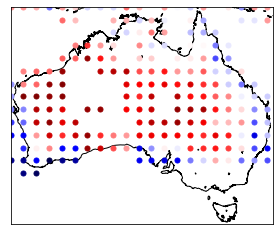

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.cm as cm

# Create a figure and an axis
fig, ax = plt.subplots()


# Define the coordinates for Australia
llcrnrlat = -44  # lower left corner latitude
urcrnrlat = -10  # upper right corner latitude
llcrnrlon = 113  # lower left corner longitude
urcrnrlon = 154  # upper right corner longitude

# Create a Basemap instance for Australia
m = Basemap(projection='cyl', resolution="i", llcrnrlat=llcrnrlat, urcrnrlat=urcrnrlat, llcrnrlon=llcrnrlon, urcrnrlon=urcrnrlon, ax=ax)

# Draw coastlines and countries
m.drawcoastlines()
m.drawcountries()

# Get the temperature values
temperatures = [result[3] for result in results]

# Create a colormap
cmap = plt.get_cmap('seismic')
normalize = plt.Normalize(vmin=min(temperatures), vmax=max(temperatures))

# Loop over the results and plot each point on the map
for result in results:
    region, (lat, lon), location, temperature, precipitation = result
    x, y = m(lon, lat)
    color = cmap(normalize(temperature))
    m.plot(x, y, 'o', markersize=5, color=color)

# Show the plot
plt.show()

In [9]:
api_calls


1